# Trojan Data Importing & Detction

### Import dependencies

In [1]:
import pandas as pd

### Import data

In [2]:
data = pd.read_csv("~/Downloads/sbdb_query_results.csv", low_memory=False)

### Separate data by group

In [4]:
trojans = data[data["class"] == "TJN"]
centaurs = data[data["class"] == "CEN"]
outermb = data[data["class"] == "OMB"]

### Prepare perihelion & aphelion

* All units are in au (astronomical units)

> These are important as if an asteroid is completely held within the aphelion and perihelion of a planet it is likely a trojan. Although it still has to be nearby one of the lagrange points.

In [6]:
perihelion = {"jupiter":5.4570}

aphelion = {"jupiter":4.9506}

### Bounds on eccentricity

In [10]:
emax = 0.3

### Initial Visualizations
* a - semi-major axis (basically orbit radius, but since things are eccentric it is slightly different)
* e - eccentricity

In [8]:
import matplotlib.pyplot as plt

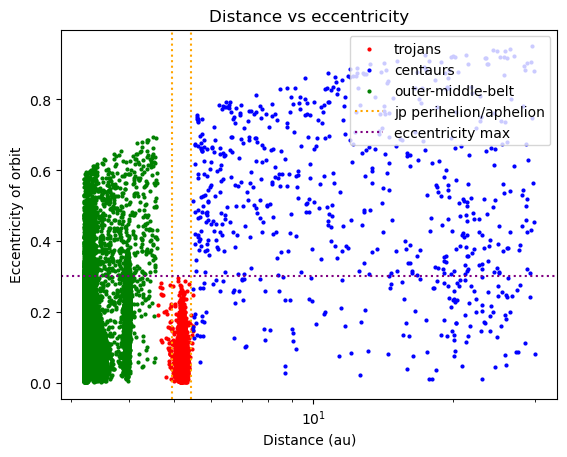

In [16]:
plt.scatter(trojans["a"], trojans["e"], c = "r", s = 4, label = "trojans")
plt.scatter(centaurs["a"], centaurs["e"], c = "b", s = 4, label = "centaurs")
plt.scatter(outermb["a"], outermb["e"], c = "g", s = 4, label = "outer-middle-belt")
plt.axvline(perihelion["jupiter"], c = "orange", linestyle = ":", label = "jp perihelion/aphelion")
plt.axvline(aphelion["jupiter"], c = "orange", linestyle = ":")
plt.axhline(emax, c = "purple", linestyle = ":", label = "eccentricity max")
plt.legend(loc = 'upper right')
plt.semilogx()
plt.title("Distance vs eccentricity")
plt.xlabel("Distance (au)")
plt.ylabel("Eccentricity of orbit")
plt.show()

### Show accuracy of predictions

In [20]:
predtrojans = trojans[(trojans["a"] >= aphelion["jupiter"]) & (trojans["a"] <= perihelion["jupiter"])]
predtrojans = predtrojans[predtrojans["e"] <= emax]

In [21]:
accuracy = len(predtrojans) / len(trojans)
print(accuracy)

0.9954106280193237
